In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Jewelry stocks - NSE tickers
jewelry_symbols = [
    "TITAN.NS",      # Titan Company Ltd
    "KALYANKJIL.NS", # Kalyan Jewellers India Ltd
    "RAJESHEXPO.NS", # Rajesh Exports Ltd
    "PNGJL.NS",      # P.N. Gadgil Jewellers Ltd
    "SENCO.NS",      # Senco Gold Ltd
    "THANGAMAYL.NS", # Thangamayil Jewellery Ltd
    "PCJEWELLER.NS", # PC Jeweller Ltd
    "GOLDIAM.NS",    # Goldiam International Ltd
    "ETHOSLTD.NS",   # Ethos Ltd
    "SKYGOLD.NS"     # Sky Gold Ltd
]

# Gold ETFs - popular NSE tickers
gold_etf_symbols = [
    "GOLDBEES.NS"
]

# Combine all symbols to fetch at once
all_symbols = jewelry_symbols + gold_etf_symbols

# Download last 1 year of daily data
data = yf.download(all_symbols, period="5y", interval="1d")["Close"]

# Show the last 5 rows of prices for all tickers
data


[*********************100%***********************]  11 of 11 completed


Ticker,ETHOSLTD.NS,GOLDBEES.NS,GOLDIAM.NS,KALYANKJIL.NS,PCJEWELLER.NS,PNGJL.NS,RAJESHEXPO.NS,SENCO.NS,SKYGOLD.NS,THANGAMAYL.NS,TITAN.NS
Date,,,,,,,,,,,
2020-09-29,NaN,44.150002,23.589092,NaN,1.420,NaN,450.592224,NaN,NaN,196.313110,1149.422241
2020-09-30,NaN,44.180000,23.607794,NaN,1.400,NaN,444.772064,NaN,NaN,195.141983,1182.950928
2020-10-01,NaN,44.099998,23.532974,NaN,1.420,NaN,454.571869,NaN,NaN,195.835098,1180.292236
2020-10-05,NaN,44.180000,23.869690,NaN,1.385,NaN,479.345001,NaN,NaN,185.534271,1176.057983
2020-10-06,NaN,44.610001,24.767611,NaN,1.400,NaN,469.296478,NaN,NaN,185.797165,1181.572266
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-23,2504.399902,95.129997,380.450012,494.950012,13.480,624.700012,192.570007,362.100006,290.000000,2065.500000,3439.199951
2025-09-24,2550.100098,94.639999,379.649994,479.100006,13.330,613.400024,190.979996,354.799988,284.850006,2053.600098,3418.300049
2025-09-25,2550.800049,94.430000,371.350006,462.549988,13.440,602.799988,189.020004,345.899994,276.850006,2064.100098,3378.500000


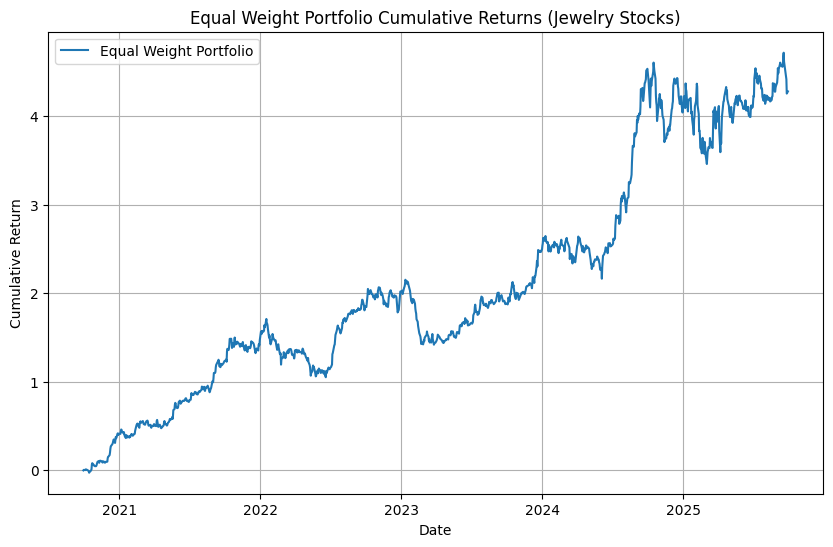

In [13]:
# Drop columns with missing data to avoid errors
prices = data.dropna(axis=1)

# Calculate daily returns
returns = prices.pct_change().dropna()

# Set equal weights
numstocks = len(returns.columns)
weights = np.repeat(1 / numstocks, numstocks)

# Calculate equal-weight daily portfolio returns
portfolio_returns = returns.mul(weights, axis=1).sum(axis=1)

# Cumulative Portfolio Returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label="Equal Weight Portfolio")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.title("Equal Weight Portfolio Cumulative Returns (Jewelry Stocks)")
plt.legend()
plt.grid()
plt.show()

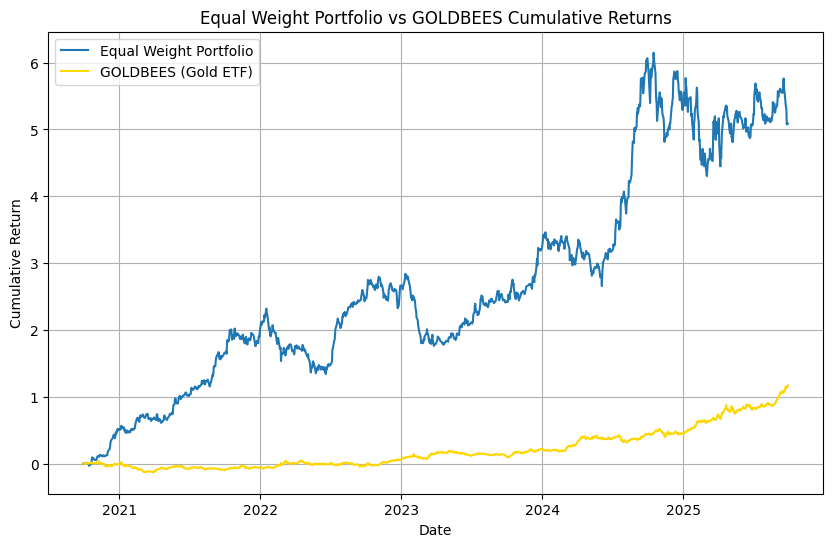

In [72]:

# Drop columns with missing data to avoid errors
prices = data.dropna(axis=1)

# Calculate daily returns
returns = prices.pct_change().dropna()

# Equal-weight portfolio (only jewelry stocks, exclude GOLDBEES)
jewelry_only = [s for s in prices.columns if s != "GOLDBEES.NS"]
jewelry_returns = returns[jewelry_only]

numstocks = len(jewelry_returns.columns)
weights = np.repeat(1 / numstocks, numstocks)

# Calculate equal-weight daily portfolio returns
portfolio_returns = jewelry_returns.mul(weights, axis=1).sum(axis=1)

# Cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# GOLDBEES cumulative return
gold_cumulative_returns = (1 + returns["GOLDBEES.NS"]).cumprod() - 1

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label="Equal Weight Portfolio")
plt.plot(gold_cumulative_returns.index, gold_cumulative_returns, label="GOLDBEES (Gold ETF)", color="gold")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.title("Equal Weight Portfolio vs GOLDBEES Cumulative Returns")
plt.legend()
plt.grid()
plt.show()


Beta between portfolio and GOLDBEES: 4.7466


C:\Users\User\AppData\Local\Temp\ipykernel_16892\2607236469.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_price = model_price.params[1]  # Beta coefficient


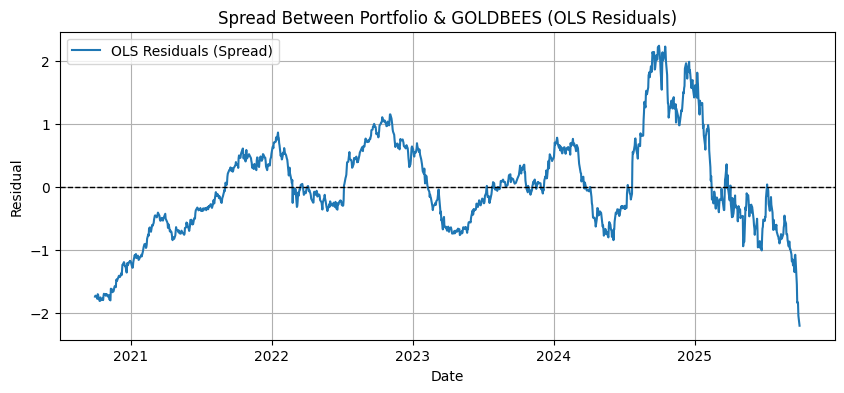

In [73]:
import statsmodels.api as sm  # for OLS regression

# Cumulative returns (convert to price-like series)
portfolio_cum_ret = (1 + portfolio_returns).cumprod()
gold_etf_cum_ret = (1 + returns["GOLDBEES.NS"]).cumprod()

# --- OLS Regression on Price Series ---
X_price = sm.add_constant(gold_etf_cum_ret)  # Add intercept
y_price = portfolio_cum_ret.loc[gold_etf_cum_ret.index]  # align indices
model_price = sm.OLS(y_price, X_price).fit()
beta_price = model_price.params[1]  # Beta coefficient
print(f"Beta between portfolio and GOLDBEES: {beta_price:.4f}")

# Residuals (spread)
model_price_res = model_price.resid

# --- Plot Residuals (Spread) ---
plt.figure(figsize=(10, 4))
plt.plot(model_price_res.index, model_price_res, label="OLS Residuals (Spread)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Spread Between Portfolio & GOLDBEES (OLS Residuals)")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid()
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller  # for ADF test

# --- Step 3: Align with gold ETF and compute spread manually ---
spread_df_price = pd.concat([portfolio_cum_ret, gold_etf_cum_ret], axis=1).dropna()
spread_df_price.columns = ["portfolio", "gold"]

# Spread = portfolio - beta * gold
spread_df_price["spread"] = spread_df_price["portfolio"] - beta_price * spread_df_price["gold"]

# --- Step 4: ADF Test for Mean Reversion ---
adf_result = adfuller(spread_df_price["spread"])
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

ADF Statistic: -2.3960
p-value: 0.1429


[*********************100%***********************]  12 of 12 completed



--- Market Beta Regression ---
                            OLS Regression Results                            
Dep. Variable:          portfolio_ret   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     132.9
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           5.45e-25
Time:                        14:46:54   Log-Likelihood:                 717.67
No. Observations:                 255   AIC:                            -1431.
Df Residuals:                     253   BIC:                            -1424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.000

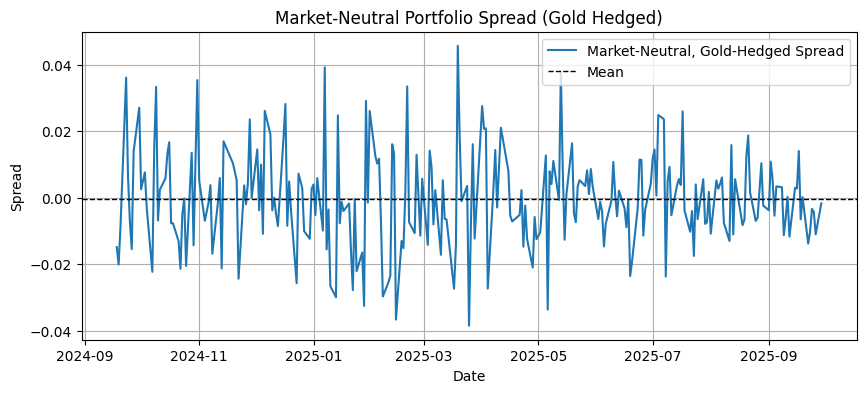

In [75]:

nifty_symbol = ["^NSEI"]  # NIFTY 50 Index

all_symbols = jewelry_symbols + gold_etf_symbols + nifty_symbol

data = yf.download(all_symbols, period="5y", interval="1d")["Close"]

# Drop missing data
prices = data.dropna(axis=0, how="any")

# -------------------------------------------
# Step 2: Calculate returns
# -------------------------------------------

returns = prices.pct_change().dropna()

# Jewelry portfolio (equal-weight)
jewelry_only = [s for s in prices.columns if s not in ["GOLDBEES.NS", "^NSEI"]]
weights = np.repeat(1 / len(jewelry_only), len(jewelry_only))
portfolio_returns = returns[jewelry_only].mul(weights, axis=1).sum(axis=1)

gold_etf_returns = returns["GOLDBEES.NS"]
nifty_returns = returns["^NSEI"]

# Market-neutral DataFrame
market_neutral_df = pd.DataFrame({
    "portfolio_ret": portfolio_returns,
    "nifty_ret": nifty_returns
}).dropna()

# -------------------------------------------
# Step 3: Regression to remove market beta
# -------------------------------------------
X = sm.add_constant(market_neutral_df["nifty_ret"])
y = market_neutral_df["portfolio_ret"]
model = sm.OLS(y, X).fit()
market_neutral_df["residuals"] = model.resid

print("\n--- Market Beta Regression ---")
print(model.summary())

# -------------------------------------------
# Step 4: Align with gold ETF (residuals vs gold)
# -------------------------------------------
spread_df = pd.concat([market_neutral_df["residuals"], gold_etf_returns], axis=1).dropna()
spread_df.columns = ["portfolio", "gold"]

# -------------------------------------------
# Step 5: Regression for hedge ratio with gold
# -------------------------------------------
X = sm.add_constant(spread_df["gold"])
y = spread_df["portfolio"]
model = sm.OLS(y, X).fit()
beta = model.params["gold"]

print(f"\nHedge Ratio (Beta vs Gold): {beta:.4f}")

# -------------------------------------------
# Step 6: Build Spread (Market-Neutral + Gold-Hedged)
# -------------------------------------------
spread_df["spread"] = spread_df["portfolio"] - beta * spread_df["gold"]

# ADF test on spread
adf_result = adfuller(spread_df["spread"])
print(f"\nADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

# -------------------------------------------
# Step 7: Plot results
# -------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(spread_df.index, spread_df["spread"], label="Market-Neutral, Gold-Hedged Spread")
plt.axhline(spread_df["spread"].mean(), color="black", linestyle="--", linewidth=1, label="Mean")
plt.title("Market-Neutral Portfolio Spread (Gold Hedged)")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  12 of 12 completed



--- Market Beta Regression ---
                            OLS Regression Results                            
Dep. Variable:          portfolio_ret   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     132.9
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           5.45e-25
Time:                        14:47:31   Log-Likelihood:                 717.67
No. Observations:                 255   AIC:                            -1431.
Df Residuals:                     253   BIC:                            -1424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.000

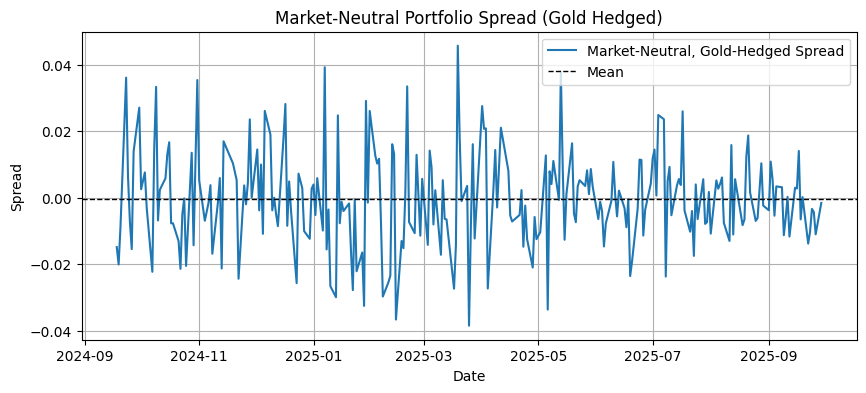

C:\Users\User\AppData\Local\Temp\ipykernel_16892\1262488161.py:118: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = strategy_df["strategy_ret"].mean() / strategy_df["strategy_ret"].std() * np.sqrt(252)
C:\Users\User\AppData\Local\Temp\ipykernel_16892\1262488161.py:118: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = strategy_df["strategy_ret"].mean() / strategy_df["strategy_ret"].std() * np.sqrt(252)
C:\Users\User\AppData\Local\Temp\ipykernel_16892\1262488161.py:118: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = strategy_df["strategy_ret"].mean() / strategy_df["strategy_ret"].std() * np.sqrt(252)
C:\Users\User\AppData\Local\Temp\ipykernel_16892\1262488161.py:118: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = strategy_df["strategy_ret"].mean() / strategy_df["strategy_ret"].std() * np.sqrt(252)



--- Top Parameter Combinations ---
    lookback  zscore  cum_return    sharpe
8         30     1.5    0.668967  3.950517
4         15     1.5    0.614000  3.727453
12        45     1.5    0.574208  3.511947
16        60     1.5    0.551247  3.389614
0         10     1.5    0.529362  2.733405
5         15     2.0    0.253969  2.640730
13        45     2.0    0.213480  2.185580
9         30     2.0    0.189085  2.075407
17        60     2.0    0.243633  2.044649
1         10     2.0    0.197562  1.958021


C:\Users\User\AppData\Local\Temp\ipykernel_16892\1262488161.py:118: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = strategy_df["strategy_ret"].mean() / strategy_df["strategy_ret"].std() * np.sqrt(252)
C:\Users\User\AppData\Local\Temp\ipykernel_16892\1262488161.py:118: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = strategy_df["strategy_ret"].mean() / strategy_df["strategy_ret"].std() * np.sqrt(252)


In [76]:
import itertools  # <-- needed for parameter grid



all_symbols = jewelry_symbols + gold_etf_symbols + nifty_symbol
data = yf.download(all_symbols, period="5y", interval="1d")["Close"]
prices = data.dropna(axis=0, how="any")

# -------------------------------------------
# Step 2: Calculate returns
# -------------------------------------------
returns = prices.pct_change().dropna()

jewelry_only = [s for s in prices.columns if s not in ["GOLDBEES.NS", "^NSEI"]]
weights = np.repeat(1 / len(jewelry_only), len(jewelry_only))
portfolio_returns = returns[jewelry_only].mul(weights, axis=1).sum(axis=1)

gold_etf_returns = returns["GOLDBEES.NS"]
nifty_returns = returns["^NSEI"]

market_neutral_df = pd.DataFrame({
    "portfolio_ret": portfolio_returns,
    "nifty_ret": nifty_returns
}).dropna()

# -------------------------------------------
# Step 3: Regression to remove market beta
# -------------------------------------------
X = sm.add_constant(market_neutral_df["nifty_ret"])
y = market_neutral_df["portfolio_ret"]
model = sm.OLS(y, X).fit()
market_neutral_df["residuals"] = model.resid

print("\n--- Market Beta Regression ---")
print(model.summary())

# -------------------------------------------
# Step 4: Align with gold ETF
# -------------------------------------------
spread_df = pd.concat([market_neutral_df["residuals"], gold_etf_returns], axis=1).dropna()
spread_df.columns = ["portfolio", "gold"]

# -------------------------------------------
# Step 5: Regression for hedge ratio
# -------------------------------------------
X = sm.add_constant(spread_df["gold"])
y = spread_df["portfolio"]
model = sm.OLS(y, X).fit()
beta = model.params["gold"]
print(f"\nHedge Ratio (Beta vs Gold): {beta:.4f}")

# -------------------------------------------
# Step 6: Build Spread
# -------------------------------------------
spread_df["spread"] = spread_df["portfolio"] - beta * spread_df["gold"]

# ADF test
adf_result = adfuller(spread_df["spread"])
print(f"\nADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")

# -------------------------------------------
# Step 7: Plot Spread
# -------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(spread_df.index, spread_df["spread"], label="Market-Neutral, Gold-Hedged Spread")
plt.axhline(spread_df["spread"].mean(), color="black", linestyle="--", linewidth=1, label="Mean")
plt.title("Market-Neutral Portfolio Spread (Gold Hedged)")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.grid()
plt.show()

# -------------------------------------------
# Step 8: Parameter Grid Search Backtest
# -------------------------------------------
zscore_thresholds = [1.5, 2, 2.5, 3]
lookbacks = [10, 15, 30, 45, 60]

results = []

for lookback, z in itertools.product(lookbacks, zscore_thresholds):
    strategy_df = pd.DataFrame()
    strategy_df["spread"] = spread_df["spread"]
    strategy_df["mean"] = strategy_df["spread"].rolling(lookback).mean()
    strategy_df["std"] = strategy_df["spread"].rolling(lookback).std()
    strategy_df["zscore"] = (strategy_df["spread"] - strategy_df["mean"]) / strategy_df["std"]

    # Trading signals
    strategy_df["long"] = strategy_df["zscore"] < -z
    strategy_df["short"] = strategy_df["zscore"] > z
    strategy_df["exit"] = strategy_df["zscore"].abs() < 0.5

    # Position state machine
    position = 0
    positions = []
    for i in range(len(strategy_df)):
        if position == 0:
            if strategy_df["long"].iloc[i]:
                position = 1
            elif strategy_df["short"].iloc[i]:
                position = -1
        elif position == 1 and strategy_df["exit"].iloc[i]:
            position = 0
        elif position == -1 and strategy_df["exit"].iloc[i]:
            position = 0
        positions.append(position)
    strategy_df["position"] = positions

    # Strategy returns
    strategy_df["spread_ret"] = strategy_df["spread"].diff()
    strategy_df["strategy_ret"] = strategy_df["position"].shift(1) * strategy_df["spread_ret"]
    strategy_df = strategy_df.dropna()

    # Store performance metrics
    cum_return = strategy_df["strategy_ret"].sum()
    sharpe = strategy_df["strategy_ret"].mean() / strategy_df["strategy_ret"].std() * np.sqrt(252)
    results.append({"lookback": lookback, "zscore": z, "cum_return": cum_return, "sharpe": sharpe})

# Convert to DataFrame & sort by Sharpe
results_df = pd.DataFrame(results).sort_values(by="sharpe", ascending=False)
print("\n--- Top Parameter Combinations ---")
print(results_df.head(10))


In [77]:
# Parameter grids
zscore_thresholds = [1.5, 2, 2.5, 3]
lookbacks = [10, 15, 30, 45, 60]

results = []

def compute_metrics(strategy_df):
    # Cumulative equity
    strategy_df["cum_equity"] = (1 + strategy_df["strategy_ret"].fillna(0)).cumprod()

    # Information Ratio (annualized Sharpe)
    daily_ret = strategy_df["strategy_ret"].dropna()
    IR = daily_ret.mean() / daily_ret.std() * np.sqrt(252) if daily_ret.std() != 0 else np.nan

    # Max Drawdown
    cum_equity = strategy_df["cum_equity"]
    rolling_max = cum_equity.cummax()
    drawdown = (cum_equity - rolling_max) / rolling_max
    maxDD = drawdown.min()

    # Trades analysis
    trades = []
    position = 0
    entry_price = 0
    for i in range(len(strategy_df)):
        pos = strategy_df["position"].iloc[i]
        spread = strategy_df["spread"].iloc[i]
        if position == 0 and pos != 0:
            position = pos
            entry_price = spread
        elif position != 0 and pos == 0:
            pnl = (spread - entry_price) * position
            trades.append(pnl)
            position = 0
    trades = np.array(trades)
    
    if len(trades) > 0:
        hit_ratio = np.sum(trades > 0) / len(trades)
        avg_profit = trades.mean()
        num_trades = len(trades)
    else:
        hit_ratio = np.nan
        avg_profit = np.nan
        num_trades = 0

    total_days = len(strategy_df)
    active_days_pct = np.sum(strategy_df["position"].abs()) / total_days * 100

    return IR, hit_ratio, maxDD, avg_profit, num_trades, total_days, active_days_pct

# Grid search
for lookback, z in itertools.product(lookbacks, zscore_thresholds):
    strategy_df = pd.DataFrame()
    strategy_df["spread"] = spread_df["spread"]
    strategy_df["mean"] = strategy_df["spread"].rolling(lookback).mean()
    strategy_df["std"] = strategy_df["spread"].rolling(lookback).std()
    strategy_df["zscore"] = (strategy_df["spread"] - strategy_df["mean"]) / strategy_df["std"]

    # Signals
    strategy_df["long"] = strategy_df["zscore"] < -z
    strategy_df["short"] = strategy_df["zscore"] > z
    strategy_df["exit"] = strategy_df["zscore"].abs() < 0.5

    # Positions
    position = 0
    positions = []
    for i in range(len(strategy_df)):
        if position == 0:
            if strategy_df["long"].iloc[i]:
                position = 1
            elif strategy_df["short"].iloc[i]:
                position = -1
        elif position == 1 and strategy_df["exit"].iloc[i]:
            position = 0
        elif position == -1 and strategy_df["exit"].iloc[i]:
            position = 0
        positions.append(position)
    strategy_df["position"] = positions

    # Strategy returns
    strategy_df["spread_ret"] = strategy_df["spread"].diff()
    strategy_df["strategy_ret"] = strategy_df["position"].shift(1) * strategy_df["spread_ret"]
    strategy_df = strategy_df.dropna()

    # Metrics
    cum_return = strategy_df["strategy_ret"].sum()
    sharpe = strategy_df["strategy_ret"].mean() / strategy_df["strategy_ret"].std() * np.sqrt(252) \
             if strategy_df["strategy_ret"].std() != 0 else np.nan
    IR, hit_ratio, maxDD, avg_profit, num_trades, total_days, active_days_pct = compute_metrics(strategy_df)

    results.append({
        "lookback": lookback,
        "zscore": z,
        "cum_return": cum_return,
        "sharpe": sharpe,
        "IR": IR,
        "HitRatio": hit_ratio,
        "MaxDD": maxDD,
        "AvgProfit": avg_profit,
        "NumTrades": num_trades,
        "TotalDays": total_days,
        "ActiveDays%": active_days_pct
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="sharpe", ascending=False)

In [78]:
print("\n--- Top Parameter Combinations ---")
print(results_df.head(10))


--- Top Parameter Combinations ---
    lookback  zscore  cum_return    sharpe        IR  HitRatio     MaxDD  \
8         30     1.5    0.668967  3.950517  3.950517       1.0 -0.032426   
4         15     1.5    0.614000  3.727453  3.727453       1.0 -0.046175   
12        45     1.5    0.574208  3.511947  3.511947       1.0 -0.052555   
16        60     1.5    0.551247  3.389614  3.389614       1.0 -0.052555   
0         10     1.5    0.529362  2.733405  2.733405       1.0 -0.052555   
5         15     2.0    0.253969  2.640730  2.640730       1.0 -0.013798   
13        45     2.0    0.213480  2.185580  2.185580       1.0 -0.032426   
9         30     2.0    0.189085  2.075407  2.075407       1.0 -0.028720   
17        60     2.0    0.243633  2.044649  2.044649       1.0 -0.032426   
1         10     2.0    0.197562  1.958021  1.958021       1.0 -0.044548   

    AvgProfit  NumTrades  TotalDays  ActiveDays%  
8    0.027874         24        226    19.026549  
4    0.026696         23 

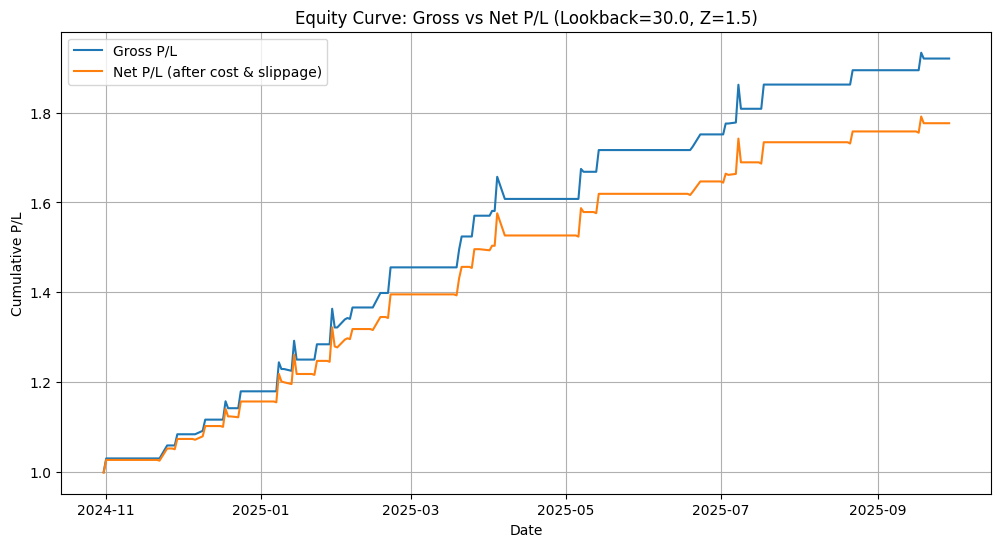

In [79]:
# --- Cost and slippage assumptions ---
trading_cost_equity = 0.0004   # 0.04%
trading_cost_etf = 0.00003     # 0.003%
slippage_equity = 0.0010       # 0.10%
slippage_etf = 0.0002          # 0.02%

# Function to calculate net strategy returns
def apply_costs(strategy_df):
    strategy_df = strategy_df.copy()
    strategy_df["gross_ret"] = strategy_df["strategy_ret"].fillna(0)
    net_ret = []
    prev_position = 0

    for i in range(len(strategy_df)):
        pos = strategy_df["position"].iloc[i]
        ret = strategy_df["gross_ret"].iloc[i]

        cost = 0
        if pos != prev_position:  # trade occurred
            # If entering/exiting equity or ETF, apply costs and slippage
            cost = (trading_cost_equity + slippage_equity) * abs(pos - prev_position)
            cost += (trading_cost_etf + slippage_etf) * abs(pos - prev_position)

        net_ret.append(ret - cost)
        prev_position = pos

    strategy_df["net_ret"] = net_ret
    strategy_df["cum_gross"] = (1 + strategy_df["gross_ret"]).cumprod()
    strategy_df["cum_net"] = (1 + strategy_df["net_ret"]).cumprod()
    return strategy_df

# Example: use best parameters (highest Sharpe from previous results)
best_params = results_df.iloc[0]
best_lookback = best_params["lookback"]
best_z = best_params["zscore"]

# Re-run strategy for the best params
strategy_df = pd.DataFrame()
strategy_df["spread"] = spread_df["spread"]
strategy_df["mean"] = strategy_df["spread"].rolling(int(best_lookback)).mean()
strategy_df["std"] = strategy_df["spread"].rolling(int(best_lookback)).std()
strategy_df["zscore"] = (strategy_df["spread"] - strategy_df["mean"]) / strategy_df["std"]

strategy_df["long"] = strategy_df["zscore"] < -best_z
strategy_df["short"] = strategy_df["zscore"] > best_z
strategy_df["exit"] = strategy_df["zscore"].abs() < 0.5

# Position state machine
position = 0
positions = []
for i in range(len(strategy_df)):
    if position == 0:
        if strategy_df["long"].iloc[i]:
            position = 1
        elif strategy_df["short"].iloc[i]:
            position = -1
    elif position == 1 and strategy_df["exit"].iloc[i]:
        position = 0
    elif position == -1 and strategy_df["exit"].iloc[i]:
        position = 0
    positions.append(position)
strategy_df["position"] = positions

# Calculate strategy returns
strategy_df["spread_ret"] = strategy_df["spread"].diff()
strategy_df["strategy_ret"] = strategy_df["position"].shift(1) * strategy_df["spread_ret"]
strategy_df = strategy_df.dropna()

# Apply costs and slippage
strategy_df = apply_costs(strategy_df)

# Plot Gross vs Net P/L
plt.figure(figsize=(12,6))
plt.plot(strategy_df.index, strategy_df["cum_gross"], label="Gross P/L")
plt.plot(strategy_df.index, strategy_df["cum_net"], label="Net P/L (after cost & slippage)")
plt.title(f"Equity Curve: Gross vs Net P/L (Lookback={best_lookback}, Z={best_z})")
plt.xlabel("Date")
plt.ylabel("Cumulative P/L")
plt.legend()
plt.grid()
plt.show()


In [80]:
def summarize_strategy(strategy_df, trading_days=252):
    """
    Computes final performance metrics for a strategy DataFrame with:
    - 'strategy_ret': daily strategy returns
    - 'position': strategy position
    """
    df = strategy_df.copy()
    df["cum_equity"] = (1 + df["strategy_ret"].fillna(0)).cumprod()
    
    # CAGR
    total_return = df["cum_equity"].iloc[-1]
    years = len(df)/trading_days
    CAGR = (total_return)**(1/years) - 1

    # Sharpe & IR
    daily_ret = df["strategy_ret"].dropna()
    Sharpe = daily_ret.mean() / daily_ret.std() * np.sqrt(trading_days) if daily_ret.std() != 0 else np.nan
    IR = Sharpe  # Information ratio here equals Sharpe vs benchmark = zero since market-neutral
    
    # Drawdown
    rolling_max = df["cum_equity"].cummax()
    drawdown = (df["cum_equity"] - rolling_max)/rolling_max
    MaxDD = drawdown.min()

    # Trades analysis
    trades = []
    position = 0
    entry_price = 0
    for i in range(len(df)):
        pos = df["position"].iloc[i]
        spread = df["spread"].iloc[i]
        if position == 0 and pos != 0:
            position = pos
            entry_price = spread
        elif position != 0 and pos == 0:
            pnl = (spread - entry_price) * position
            trades.append(pnl)
            position = 0
    trades = np.array(trades)
    
    if len(trades) > 0:
        HitRatio = np.sum(trades>0)/len(trades)
        AvgProfit = trades[trades>0].mean() if np.any(trades>0) else np.nan
        AvgLoss = trades[trades<0].mean() if np.any(trades<0) else np.nan
        NumTrades = len(trades)
    else:
        HitRatio = np.nan
        AvgProfit = np.nan
        AvgLoss = np.nan
        NumTrades = 0

    return {
        "CAGR": CAGR*100,
        "Sharpe": Sharpe,
        "IR": IR,
        "HitRatio": HitRatio,
        "MaxDD": MaxDD*100,
        "AvgProfit": AvgProfit,
        "AvgLoss": AvgLoss,
        "NumTrades": NumTrades
    }

# Example usage with best parameter strategy
summary_metrics = summarize_strategy(strategy_df)

# Display like requested
print("\nMean performance across 5-folds (simulated single run here):\n")
for k, v in summary_metrics.items():
    if isinstance(v, float):
        print(f"{k}: {v:.6f}")
    else:
        print(f"{k}: {v}")



Mean performance across 5-folds (simulated single run here):

CAGR: 106.985711
Sharpe: 3.950517
IR: 3.950517
HitRatio: 1.000000
MaxDD: -3.242576
AvgProfit: 0.027874
AvgLoss: nan
NumTrades: 24
